# Car Colour Prediction Model
This model is used to predict the colour of a car image in traffic.

In [47]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import cv2

In [9]:
TRAIN_DIR = 'C:/Users/VIAN/Desktop/nullclass/car_detection/train'
VAL_DIR = 'C:/Users/VIAN/Desktop/nullclass/car_detection/val'
TEST_DIR = 'C:/Users/VIAN/Desktop/nullclass/car_detection/test'

In [10]:
IMG_SIZE=244

In [11]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
# load and iterate training dataset
train_it = traingen.flow_from_directory(TRAIN_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)
# load and iterate validation dataset
val_it = valgen.flow_from_directory(VAL_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE),batch_size=64)
# load and iterate test dataset
test_it = testgen.flow_from_directory(TEST_DIR, class_mode='categorical',target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [21]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
model = define_model()
history = model.fit(train_it, epochs=10, verbose=1)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.0968 - loss: 2.6956
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.1860 - loss: 2.5351
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.3103 - loss: 2.0672
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.4802 - loss: 1.5706
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5606 - loss: 1.2982
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 521s 5s/step - accuracy: 0.6072 - loss: 1.1526
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6632 - loss: 0.9993
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.6683 - loss: 0.9632
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.6893 - loss: 0.8926
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.6995 - loss: 0.8650


In [30]:
loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
acc

0.7397172451019287

In [52]:
# Save the model  
model.save('car_colour_pred.h5')  
  
# Load the model for deployment  
model = tf.keras.models.load_model('car_colour_pred.h5')  
  
# Define a function to predict car colour from an image  
def predict_car_colour(image_path):  
    img = cv2.imread(image_path)  
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    pred = model.predict(img)  
    return np.argmax(pred)  

In [49]:
import matplotlib.pyplot as plt
import sys
# plot diagnostic learning curves
def show_training_curves(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.tight_layout()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

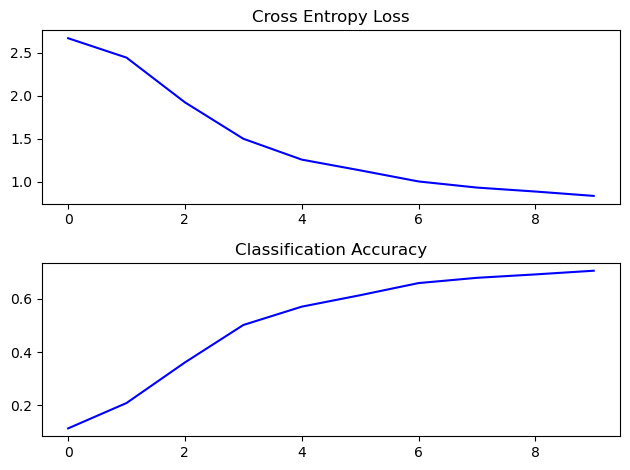

In [50]:
show_training_curves(history)

In [56]:
#creating the gui application
import tkinter as tk  
from tkinter import filedialog  
from PIL import Image, ImageTk 

def upload_image():  
    global file_path  
    file_path = filedialog.askopenfilename()  
    uploaded = Image.open(file_path)  
    uploaded.thumbnail((224, 224))  
    im = ImageTk.PhotoImage(uploaded)  
    car_colour.configure(image=im)  
    car_colour.image = im  
    label1.configure(text='')  
    
def detect_car_colour():  
    global pred
    pred = predict_car_colour(file_path)   
    label1.configure(text=predict_car_colour[pred])  
    
root = tk.Tk()  
root.title('Traffic Car Recognition')  
root.geometry('400x400')  
    
upload = tk.Button(root, text='Upload Image', command=upload_image)  
upload.pack()  
    
car_colour = tk.Label(root)  
car_colour.pack()  
label1 = tk.Label(root, text='')  
label1.pack()  
    
detect_button = tk.Button(root, text='Detect Car Colour', command=detect_car_colour)  
detect_button.pack()  
root.mainloop() 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\VIAN\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\VIAN\AppData\Local\Temp\ipykernel_2508\3415844995.py", line 19, in detect_car_colour
    label1.configure(text=predict_car_colour[pred])
                        ~~~~~~~~~~~~~~~~~~^^^^^^
TypeError: 'function' object is not subscriptable
